# Flights Data Exploration
## by Thays Martinez

## Preliminary Wrangling

This document explores approximately 5.3 million cancelled and delayed flights within United States and Canada which were registered between 1st of January 2018 and 31st of December 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

Let's look into cancelled flights data first.

In [2]:
# Load datasets into a pandas DataFrame
df_flights = pd.read_csv('flights.csv', low_memory=False)

In [3]:
# High-level overview of data shape and composition
pd.set_option('display.max_columns', 30)
print(df_flights.shape)
print(df_flights.dtypes)

(5268948, 29)
fl_date                 object
origin_airport          object
origin_city             object
origin_state            object
dest_airport            object
dest_city               object
dest_state              object
crs_dep_time            object
actual_dep_time         object
dep_delay              float64
taxi_out               float64
wheels_off              object
wheels_on               object
taxi_in                float64
crs_arr_time            object
actual_arr_time         object
arr_delay              float64
cancelled                int64
cancellation_desc       object
diverted                 int64
crs_elapsed_time         int64
actual_elapsed_time    float64
air_time               float64
distance                 int64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object


In [4]:
# Convert to datetime
df_flights['fl_date'] = pd.to_datetime(df_flights['fl_date'])

# Convert to category
df_flights['cancellation_desc'] = df_flights['cancellation_desc'].astype('category')

# Convert columns to time timestamp
columns = ['crs_dep_time', 'crs_arr_time']

for column in columns:
    df_flights[column] = df_flights[column].apply(lambda x: datetime.strptime(x, '%H:%M:%S').time())

In [5]:
# Display first 5 rows
df_flights.head()

,fl_date,origin_airport,origin_city,origin_state,dest_airport,dest_city,dest_state,crs_dep_time,actual_dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,actual_arr_time,arr_delay,cancelled,cancellation_desc,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019-03-01,CVG,Cincinnati,OH,MSP,Minneapolis,MN,15:34:00,16:17:00,43.0,28.0,16:45:00,17:29:00,18.0,16:48:00,17:47:00,59.0,0,NaN,0,134,90.0,74.0,596,0.0,0.0,59.0,0.0,0.0
1,2019-03-01,JFK,New York,NY,BUF,Buffalo,NY,09:40:00,10:35:00,55.0,56.0,11:31:00,12:28:00,8.0,11:14:00,12:36:00,82.0,0,NaN,0,94,121.0,94.0,301,0.0,55.0,27.0,0.0,0.0
2,2019-03-01,MSN,Madison,WI,LGA,New York,NY,18:45:00,19:54:00,69.0,14.0,20:08:00,22:59:00,13.0,21:58:00,23:12:00,74.0,0,NaN,0,133,198.0,193.0,812,0.0,0.0,6.0,0.0,68.0
3,2019-03-01,JFK,New York,NY,BUF,Buffalo,NY,13:36:00,15:30:00,114.0,30.0,16:00:00,16:52:00,6.0,15:13:00,16:58:00,105.0,0,NaN,0,97,88.0,97.0,301,35.0,0.0,0.0,0.0,70.0
4,2019-03-01,ATL,Atlanta,GA,TYS,Knoxville,TN,13:40:00,14:25:00,45.0,18.0,14:43:00,15:17:00,3.0,14:38:00,15:20:00,42.0,0,NaN,0,58,55.0,58.0,152,42.0,0.0,0.0,0.0,0.0


In [6]:
# Overview after data transformation
df_flights.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268948 entries, 0 to 5268947
Data columns (total 29 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   fl_date              5268948 non-null  datetime64[ns]
 1   origin_airport       5268948 non-null  object        
 2   origin_city          5268948 non-null  object        
 3   origin_state         5268948 non-null  object        
 4   dest_airport         5268948 non-null  object        
 5   dest_city            5268948 non-null  object        
 6   dest_state           5268948 non-null  object        
 7   crs_dep_time         5268948 non-null  object        
 8   actual_dep_time      5017439 non-null  object        
 9   dep_delay            5017439 non-null  float64       
 10  taxi_out             5017439 non-null  float64       
 11  wheels_off           5017439 non-null  object        
 12  wheels_on            5017439 non-null  object        
 1

In [7]:
# Descriptive statistics for numeric variables
df_cancelled.describe()

NameError: name 'df_cancelled' is not defined

### What is the structure of your dataset?

This dataset contains 5,268,948 flights which were cancelled or delayed. It is comprised of 29 features:

- fl_date: flight date (YYYY-MM-DD)
- origin_airport: departure airport
- origin_city: departure city
- origin_state: departure state
- dest_airport: airport of arrival
- dest_city: arrival city
- dest_state: arrival state
- crs_dep_time: scheduled departure time registered in CRS (Computer/Central Reservation System) (HH:MM:SS)
- actual_dep_time: actual departure time (HH:MM:SS)
- dep_delay: difference in minutes between scheduled and actual departure time. 
- taxi_out: time taken to taki aircraft before departure, in minutes
- wheels_off: time wheels leave the ground (HH:MM:SS)
- wheels_on: time wheels touch the ground (HH:MM:SS)
- taxi_in: time taken to taki aircraft upon arrival, in minutes
- crs_arr_time: scheduled arrival time registered in CRS (HH:MM:SS)
- actual_arr_time: actual arrival time (HH:MM:SS)
- arr_delay: difference in minutes between scheduled and actual arrival time. 
- cancelled: flag if flight was cancelled (1) or finalized (0)
- cancellation_desc: reason for cancellation (Weather, Carrier, NAS or Security).
- diverted: if flight was rerouted (1) or not (0)
- crs_elapsed_time: CRS elapsed time of flight, in minutes
- actual_elapsed_time: elapsed time of flight, in minutes
- air_time: flight time, in minutes
- distance: distance between airports, in miles
- delay_cause columns: causes of delay in broad categories that were created by the Air Carrier On-Time Reporting Advisory Committee (Carrier, Weather, NAS, Security, Late Aircraft Arrival)
- delay_duration: delay in minutes

Most variables are either numeric or object types. The variable **cancellation_desc** is categorical and has the following classification:

- **Carrier:** The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
- **Late Aircraft:** A previous flight with same aircraft arrived late, causing the present flight to depart late.
- **NAS:** Stands for National Aviation System. Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.
- **Security:** Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
- **Weather:** Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting flight cancellation and severe delays.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Although delay cause will give us a good indication of the reason a flight is delayed, I am also expecting that features such as flight date, origin state and CRS departure time, will have effects on flight's cancellation and delay duration. I also think that other features will have effects on the delay's duration, though to a much smaller degree.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [11]:
cancelled = df_flights.query('cancelled == 1').cancelled.count() / df_flights.shape[0] * 100
finalized = (100 - cancelled)

print('Finalized: {}%'.format(round(finalized, 2)))
print('Cancelled: {}%'.format(round(cancelled, 2)))

Finalized: 95.23%
Cancelled: 4.77%


Flights with cancelled status accounts for 5% of the dataset. Note that we have only flights that are either cancelled or delayed.

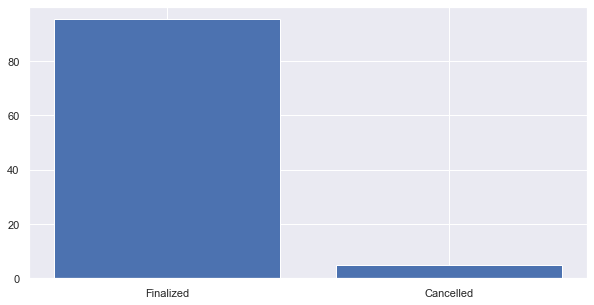

In [12]:
sb.set(style='darkgrid')
plt.figure(figsize=[10, 5])

ax = plt.bar(x = ['Finalized', 'Cancelled'], height=[finalized, cancelled], data=df_flights)

In [13]:
def chart_props(col_name, df=df_flights, x_axis=True, order_cat=True):
    # create the plot
    base_color = sb.color_palette()[0]
    col_order = df[col_name].value_counts().index
    plt.figure(figsize=[10, 5])
    
    if x_axis & order_cat:
        sb.countplot(data=df, x=col_name, color=base_color, order=col_order)
    elif (not x_axis) & (not order_cat):
        sb.countplot(data=df, y=col_name, color=base_color)
    elif (not x_axis) & (order_cat):
        sb.countplot(data=df, y=col_name, color=base_color, order=col_order)
    else:
        sb.countplot(data=df, x=col_name, color=base_color)

    # add annotations
    n_points = df.shape[0]
    cat_counts = df[col_name].value_counts()
    locs, labels = plt.xticks() # get the current tick locations and labels
    
    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):
        
        # get the text property for the label to get the correct count
        count = cat_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_points)
        
        # print the annotation just below the top of the bar
        plt.text(loc, count, pct_string, ha = 'center', verticalalignment='bottom', color = 'black')

In [32]:
# Display first cancelled flights data
df_cancelled = df_flights.query('cancelled == 1')
df_cancelled.head()

,fl_date,year,month,origin_airport,origin_city,origin_state,dest_airport,dest_city,dest_state,crs_dep_time,hour,actual_dep_time,dep_delay,taxi_out,wheels_off,...,crs_arr_time,actual_arr_time,arr_delay,cancelled,cancellation_desc,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
5017439,2019-03-01,2019,03,ORF,Norfolk,VA,LGA,New York,NY,18:55:00,18,NaN,NaN,NaN,NaN,...,20:42:00,NaN,NaN,1,Weather,0,107,NaN,NaN,296,NaN,NaN,NaN,NaN,NaN
5017440,2019-03-01,2019,03,CHO,Charlottesville,VA,CLT,Charlotte,NC,19:40:00,19,NaN,NaN,NaN,NaN,...,21:05:00,NaN,NaN,1,Weather,0,85,NaN,NaN,245,NaN,NaN,NaN,NaN,NaN
5017441,2019-03-01,2019,03,CLT,Charlotte,NC,CHO,Charlottesville,VA,17:55:00,17,NaN,NaN,NaN,NaN,...,19:10:00,NaN,NaN,1,Weather,0,75,NaN,NaN,245,NaN,NaN,NaN,NaN,NaN
5017442,2019-03-01,2019,03,GSP,Greer,SC,ORD,Chicago,IL,10:11:00,10,NaN,NaN,NaN,NaN,...,11:15:00,NaN,NaN,1,Weather,0,64,NaN,NaN,577,NaN,NaN,NaN,NaN,NaN
5017443,2019-03-01,2019,03,DFW,Dallas/Fort Worth,TX,CRP,Corpus Christi,TX,20:43:00,20,NaN,NaN,NaN,NaN,...,22:07:00,NaN,NaN,1,Weather,0,84,NaN,NaN,354,NaN,NaN,NaN,NaN,NaN


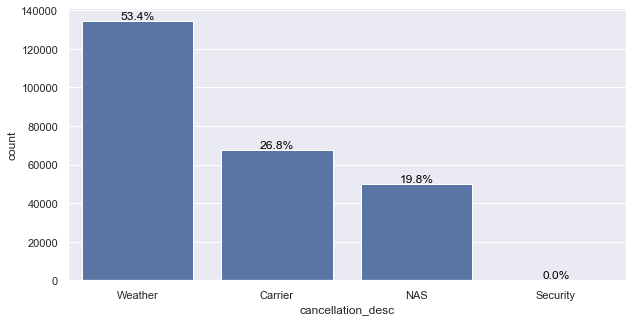

In [14]:
# Generate chart
chart_props('cancellation_desc', df=df_cancelled)

More than half of cancelled flights have severe weather condition as cause for cancellation. Does are there changes from 2018 to 2019?

In [17]:
# Break down date into year and month
year = df_cancelled['fl_date'].astype(str).str[:4]
month = df_cancelled['fl_date'].astype(str).str[5:7]

# Extract hour portion from crs_dep_time column
hour = df_cancelled['crs_dep_time'].astype(str).str[:2]

# Add new columns to DataFrame
df_cancelled.insert(1, 'year', year, True)
df_cancelled.insert(2, 'month', month, True)
df_cancelled.insert(10, 'hour', hour, True)

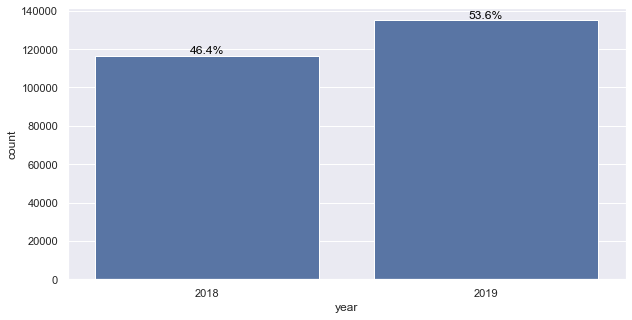

In [23]:
chart_props('year', df=df_cancelled, order_cat=False)

In 2019, there was an increase of 7.2% in cancelled flights when compared to previous year.

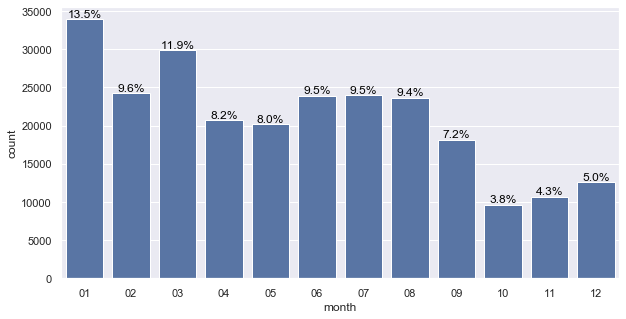

In [24]:
chart_props('month', df=df_cancelled, order_cat=False)

It looks like flights tend to be cancelled more in the first quarter of the year. Flight cancellation progressively decreases, registering lower cancellation rate in the last quarter.

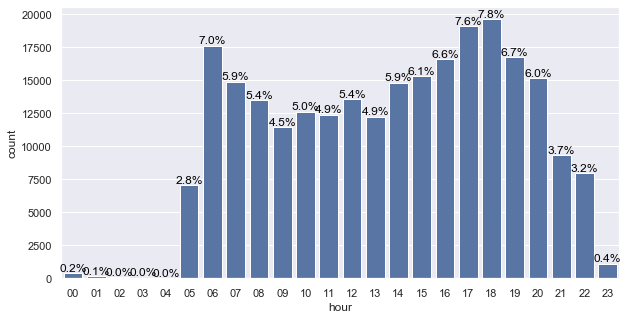

In [25]:
chart_props('hour', df=df_cancelled, order_cat=False)

What is the major cause for cancellation at 6h, 17h and 18h? Why there is almost no cancellation between 0h and 4h? Is the trend similar in both years?

In [33]:
df_delayed = df_flights.query('cancelled == 0')

In [34]:
df_delayed.head()

,fl_date,origin_airport,origin_city,origin_state,dest_airport,dest_city,dest_state,crs_dep_time,actual_dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,actual_arr_time,arr_delay,cancelled,cancellation_desc,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019-03-01,CVG,Cincinnati,OH,MSP,Minneapolis,MN,15:34:00,16:17:00,43.0,28.0,16:45:00,17:29:00,18.0,16:48:00,17:47:00,59.0,0,NaN,0,134,90.0,74.0,596,0.0,0.0,59.0,0.0,0.0
1,2019-03-01,JFK,New York,NY,BUF,Buffalo,NY,09:40:00,10:35:00,55.0,56.0,11:31:00,12:28:00,8.0,11:14:00,12:36:00,82.0,0,NaN,0,94,121.0,94.0,301,0.0,55.0,27.0,0.0,0.0
2,2019-03-01,MSN,Madison,WI,LGA,New York,NY,18:45:00,19:54:00,69.0,14.0,20:08:00,22:59:00,13.0,21:58:00,23:12:00,74.0,0,NaN,0,133,198.0,193.0,812,0.0,0.0,6.0,0.0,68.0
3,2019-03-01,JFK,New York,NY,BUF,Buffalo,NY,13:36:00,15:30:00,114.0,30.0,16:00:00,16:52:00,6.0,15:13:00,16:58:00,105.0,0,NaN,0,97,88.0,97.0,301,35.0,0.0,0.0,0.0,70.0
4,2019-03-01,ATL,Atlanta,GA,TYS,Knoxville,TN,13:40:00,14:25:00,45.0,18.0,14:43:00,15:17:00,3.0,14:38:00,15:20:00,42.0,0,NaN,0,58,55.0,58.0,152,42.0,0.0,0.0,0.0,0.0


In [ ]:
# This chart shows outliers, next chart will focus on delays
bin_edges = np.arange(flights.arr_delay.min(), flights.arr_delay.max()+30, 30)
plt.figure(figsize=[8, 5])
plt.hist(data=flights, x='arr_delay', bins=bin_edges);

In [ ]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.1
range_min = np.log10(flights.arr_delay.min())
range_max = np.log10(flights.arr_delay.max())
bins = 10 ** np.arange(range_min, range_max+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=flights, x='arr_delay', bins = bins)
plt.xscale('log')
plt.xticks([120, 1e3, 2e3, 5e3, 1e4, 2e4], [120, '240', '480', '960', '1920', '3840'])
plt.xlabel('Delay (min)')
plt.show()

Most flight delays are in the range of 2 to 8 hours.

In [ ]:
# During which times occur the most delays?
flights['crs_hour'] = flights['crs_dep_time'].astype(str).str[0:2]

In [ ]:
chart_props('crs_hour', order_cat=False)

Delays start to build up as the hours passes by, reaching a peak at 5PM, and decreases hour by hour. Aircraft delay being the main cause, the decrease may be due to end of aircraft operation for that day.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!